In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Перш за все дослідимо датасет

In [42]:
train_data = pd.read_csv("./data/application_train.csv")
test_data = pd.read_csv("./data/application_test.csv")

In [43]:
print(f"Форма датасету (train): {train_data.shape}")
train_data.head()

Форма датасету (train): (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
print(f"Форма датасету (test): {test_data.shape}")
test_data.head()

Форма датасету (test): (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#Виведемо на екран усі  фічі з їх типами тренувальних даних
print("All types (train):\n", train_data.dtypes)
print("\nTypes count (train):\n", train_data.dtypes.value_counts())

All types (train):
 SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

Types count (train):
 float64    65
int64      41
object     16
Name: count, dtype: int64


In [46]:
#Аналогічно для тестових
print("All types (test):\n", test_data.dtypes)
print("\nTypes count (test):\n", test_data.dtypes.value_counts())

All types (test):
 SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

Types count (test):
 float64    65
int64      40
object     16
Name: count, dtype: int64


Бачимо, що кількість колонок у файлах для тренування та тестування різне - для тренування на 1 колонку більше. Адже тренувальні дані містять 122 колонки, включно із target, яка є цільовою колонкою. Покажемо target.

In [47]:
copied = train_data.copy()
copied.drop(columns=list(test_data.columns), inplace=True)
copied

,TARGET
0,1
1,0
2,0
3,0
4,0
...,...
307506,0
307507,0
307508,0
307509,1


Дослідимо розподіл цільової колонки

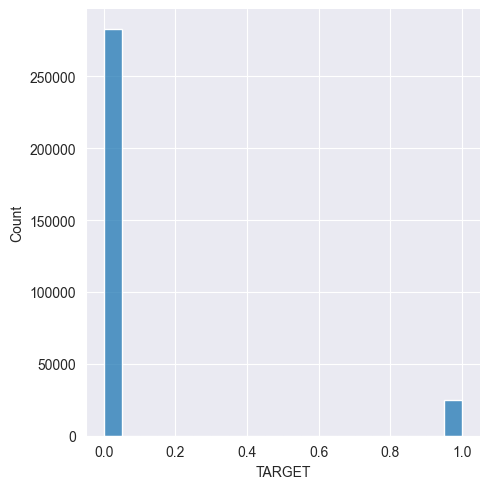

In [48]:
sns.displot(train_data['TARGET'])

Як бачимо розподіл не збалансований в сторону нуля, а це означає, що у моделі може бути більш упередження ставлення до класу

Дослідимо відсутні значення кожної колонки

In [49]:
def get_missing(data_set: pd.DataFrame, data_name):
    missing_values = data_set.isnull().sum()
    missing_values_percent = (missing_values / len(data_set)) * 100
    missing_values_ds = pd.concat([missing_values, missing_values_percent], axis=1)
    missing_values_ds.columns = ['Відсутні значення', 'Відсоток']
    missing_values_ds = missing_values_ds[missing_values_ds['Відсоток'] != 0]
    missing_values_ds = missing_values_ds.sort_values('Відсоток', ascending=False)
    print(f"Кількість відсутніх значень ({data_name}): {missing_values_ds.shape[0]}")
    return missing_values_ds

def get_unique(data_set: pd.DataFrame, data_name):
    unique_values = data_set.nunique()
    unique_values_percent = (unique_values / len(data_set)) * 100
    unique_values_ds = pd.concat([unique_values, unique_values_percent], axis=1)
    unique_values_ds.columns = ['Унікальні значення', 'Відсоток']
    unique_values_ds = unique_values_ds[unique_values_ds['Відсоток'] != 0]
    unique_values_ds = unique_values_ds.sort_values('Відсоток', ascending=False)
    print(f"Кількість унікальних значень ({data_name}): {unique_values_ds.shape[0]}")
    return unique_values_ds

In [50]:
get_missing(train_data, "train data")

Кількість відсутніх значень (train data): 67


,Відсутні значення,Відсоток
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
...,...,...
EXT_SOURCE_2,660,0.214626
AMT_GOODS_PRICE,278,0.090403
AMT_ANNUITY,12,0.003902
CNT_FAM_MEMBERS,2,0.000650


In [51]:
get_missing(test_data, "test data")

Кількість відсутніх значень (test data): 64


,Відсутні значення,Відсоток
COMMONAREA_MODE,33495,68.716150
COMMONAREA_MEDI,33495,68.716150
COMMONAREA_AVG,33495,68.716150
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
NONLIVINGAPARTMENTS_AVG,33347,68.412523
...,...,...
OBS_60_CNT_SOCIAL_CIRCLE,29,0.059495
DEF_30_CNT_SOCIAL_CIRCLE,29,0.059495
OBS_30_CNT_SOCIAL_CIRCLE,29,0.059495
AMT_ANNUITY,24,0.049237


Отже, бачимо що велика частина із стовпців мають пропущені дані

In [52]:
get_unique(train_data, "train data")

Кількість унікальних значень (train data): 122


,Унікальні значення,Відсоток
SK_ID_CURR,307511,100.000000
EXT_SOURCE_2,119831,38.968037
EXT_SOURCE_1,114584,37.261756
DAYS_BIRTH,17460,5.677846
DAYS_REGISTRATION,15688,5.101606
...,...,...
NAME_CONTRACT_TYPE,2,0.000650
FLAG_DOCUMENT_2,2,0.000650
FLAG_DOCUMENT_3,2,0.000650
FLAG_DOCUMENT_4,2,0.000650


In [53]:
get_unique(test_data, "test data")

Кількість унікальних значень (test data): 121


,Унікальні значення,Відсоток
SK_ID_CURR,48744,100.000000
EXT_SOURCE_2,38885,79.773921
EXT_SOURCE_1,27207,55.816100
DAYS_BIRTH,15477,31.751600
DAYS_REGISTRATION,12618,25.886263
...,...,...
FLAG_DOCUMENT_14,1,0.002052
FLAG_DOCUMENT_13,1,0.002052
FLAG_DOCUMENT_12,1,0.002052
FLAG_DOCUMENT_10,1,0.002052


Видалимо колонки де маємо велику кількість невизначених даних

In [54]:
col_count = 45000
test_data = test_data.drop(test_data.columns[test_data.isna().sum() > col_count], axis=1)
train_data = train_data.drop(train_data.columns[train_data.isna().sum() > col_count], axis=1)

Перевіримо кількість дубльованих даних 

In [55]:
dub_train = train_data.duplicated().sum()
dub_test = test_data.duplicated().sum()
dub_train, dub_train

(0, 0)

Розподіл даних

In [56]:
train_data.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [57]:
test_data.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


Розділимо дані на чисельні та категоріалні. До категоріальних віднесемо значення де тип даних object, а також візьмемо значення де колонка починаєтсья на FLAG, оскільки це скоріш за все булеві змінні.

In [58]:
categorical = train_data.select_dtypes('object').columns.tolist() + \
                train_data.filter(like='FLAG').columns.tolist() 
categorical

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

Решту позначимо як числові

In [59]:
numerical = list(set(train_data.columns) - set(categorical))
numerical.remove('SK_ID_CURR')
numerical

['REG_REGION_NOT_WORK_REGION',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'TARGET',
 'AMT_CREDIT',
 'CNT_CHILDREN',
 'HOUR_APPR_PROCESS_START',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_ANNUITY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_BIRTH',
 'REG_REGION_NOT_LIVE_REGION',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REGION_RATING_CLIENT',
 'DAYS_REGISTRATION',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'EXT_SOURCE_2',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'AMT_GOODS_PRICE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'REG_CITY_NOT_WORK_CITY',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'DAYS_ID_PUBLISH',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_QRT']

Розподіл чисельних і категоріальних даних

In [60]:
train_data[numerical].describe()

,REG_REGION_NOT_WORK_REGION,AMT_REQ_CREDIT_BUREAU_DAY,TARGET,AMT_CREDIT,CNT_CHILDREN,HOUR_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE,AMT_ANNUITY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_YEAR,...,EXT_SOURCE_2,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,AMT_GOODS_PRICE,DEF_30_CNT_SOCIAL_CIRCLE,REG_CITY_NOT_WORK_CITY,AMT_REQ_CREDIT_BUREAU_MON,DAYS_ID_PUBLISH,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_QRT
count,307511.000000,265992.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307510.000000,307499.000000,265992.000000,265992.000000,...,3.068510e+05,307511.000000,307511.000000,3.072330e+05,306490.000000,307511.000000,265992.000000,307511.000000,3.075110e+05,265992.000000
mean,0.050769,0.007000,0.080729,5.990260e+05,0.417052,12.063419,-962.858788,27108.573909,0.006402,1.899974,...,5.143927e-01,0.020868,63815.045904,5.383962e+05,0.143421,0.230454,0.267395,-2994.202373,1.687979e+05,0.265474
std,0.219526,0.110757,0.272419,4.024908e+05,0.722121,3.265832,826.808487,14493.737315,0.083849,1.869295,...,1.910602e-01,0.013831,141275.766519,3.694465e+05,0.446698,0.421124,0.916002,1509.450419,2.371231e+05,0.794056
min,0.000000,0.000000,0.000000,4.500000e+04,0.000000,0.000000,-4292.000000,1615.500000,0.000000,0.000000,...,8.173617e-08,0.000290,-17912.000000,4.050000e+04,0.000000,0.000000,0.000000,-7197.000000,2.565000e+04,0.000000
25%,0.000000,0.000000,0.000000,2.700000e+05,0.000000,10.000000,-1570.000000,16524.000000,0.000000,0.000000,...,3.924574e-01,0.010006,-2760.000000,2.385000e+05,0.000000,0.000000,0.000000,-4299.000000,1.125000e+05,0.000000
50%,0.000000,0.000000,0.000000,5.135310e+05,0.000000,12.000000,-757.000000,24903.000000,0.000000,1.000000,...,5.659614e-01,0.018850,-1213.000000,4.500000e+05,0.000000,0.000000,0.000000,-3254.000000,1.471500e+05,0.000000
75%,0.000000,0.000000,0.000000,8.086500e+05,1.000000,14.000000,-274.000000,34596.000000,0.000000,3.000000,...,6.636171e-01,0.028663,-289.000000,6.795000e+05,0.000000,0.000000,0.000000,-1720.000000,2.025000e+05,0.000000
max,1.000000,9.000000,1.000000,4.050000e+06,19.000000,23.000000,0.000000,258025.500000,4.000000,25.000000,...,8.549997e-01,0.072508,365243.000000,4.050000e+06,34.000000,1.000000,27.000000,0.000000,1.170000e+08,261.000000


In [61]:
train_data[categorical].describe()

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,0.000042,0.710023,0.000081,0.015115,...,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
std,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.006502,0.453752,0.009016,0.122010,...,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Кореляція колонок відносно TARGET 

In [62]:
correlations = train_data[numerical].corr()['TARGET'].sort_values(ascending=False)
print(correlations.head(10))
print(correlations.tail(10))

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
REG_CITY_NOT_LIVE_CITY         0.044395
DAYS_REGISTRATION              0.041975
LIVE_CITY_NOT_WORK_CITY        0.032518
Name: TARGET, dtype: float64
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
AMT_INCOME_TOTAL             -0.003982
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
AMT_ANNUITY                  -0.012817
HOUR_APPR_PROCESS_START      -0.024166
AMT_CREDIT                   -0.030369
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_2                 -0.160472
Name: TARGET, dtype: float64


Як бачимо найбільша кореляцію представляє колонка DAYS_BIRTH, а найменшу EXT_SOURCE_2 

Подивимось на розподіл числових даних

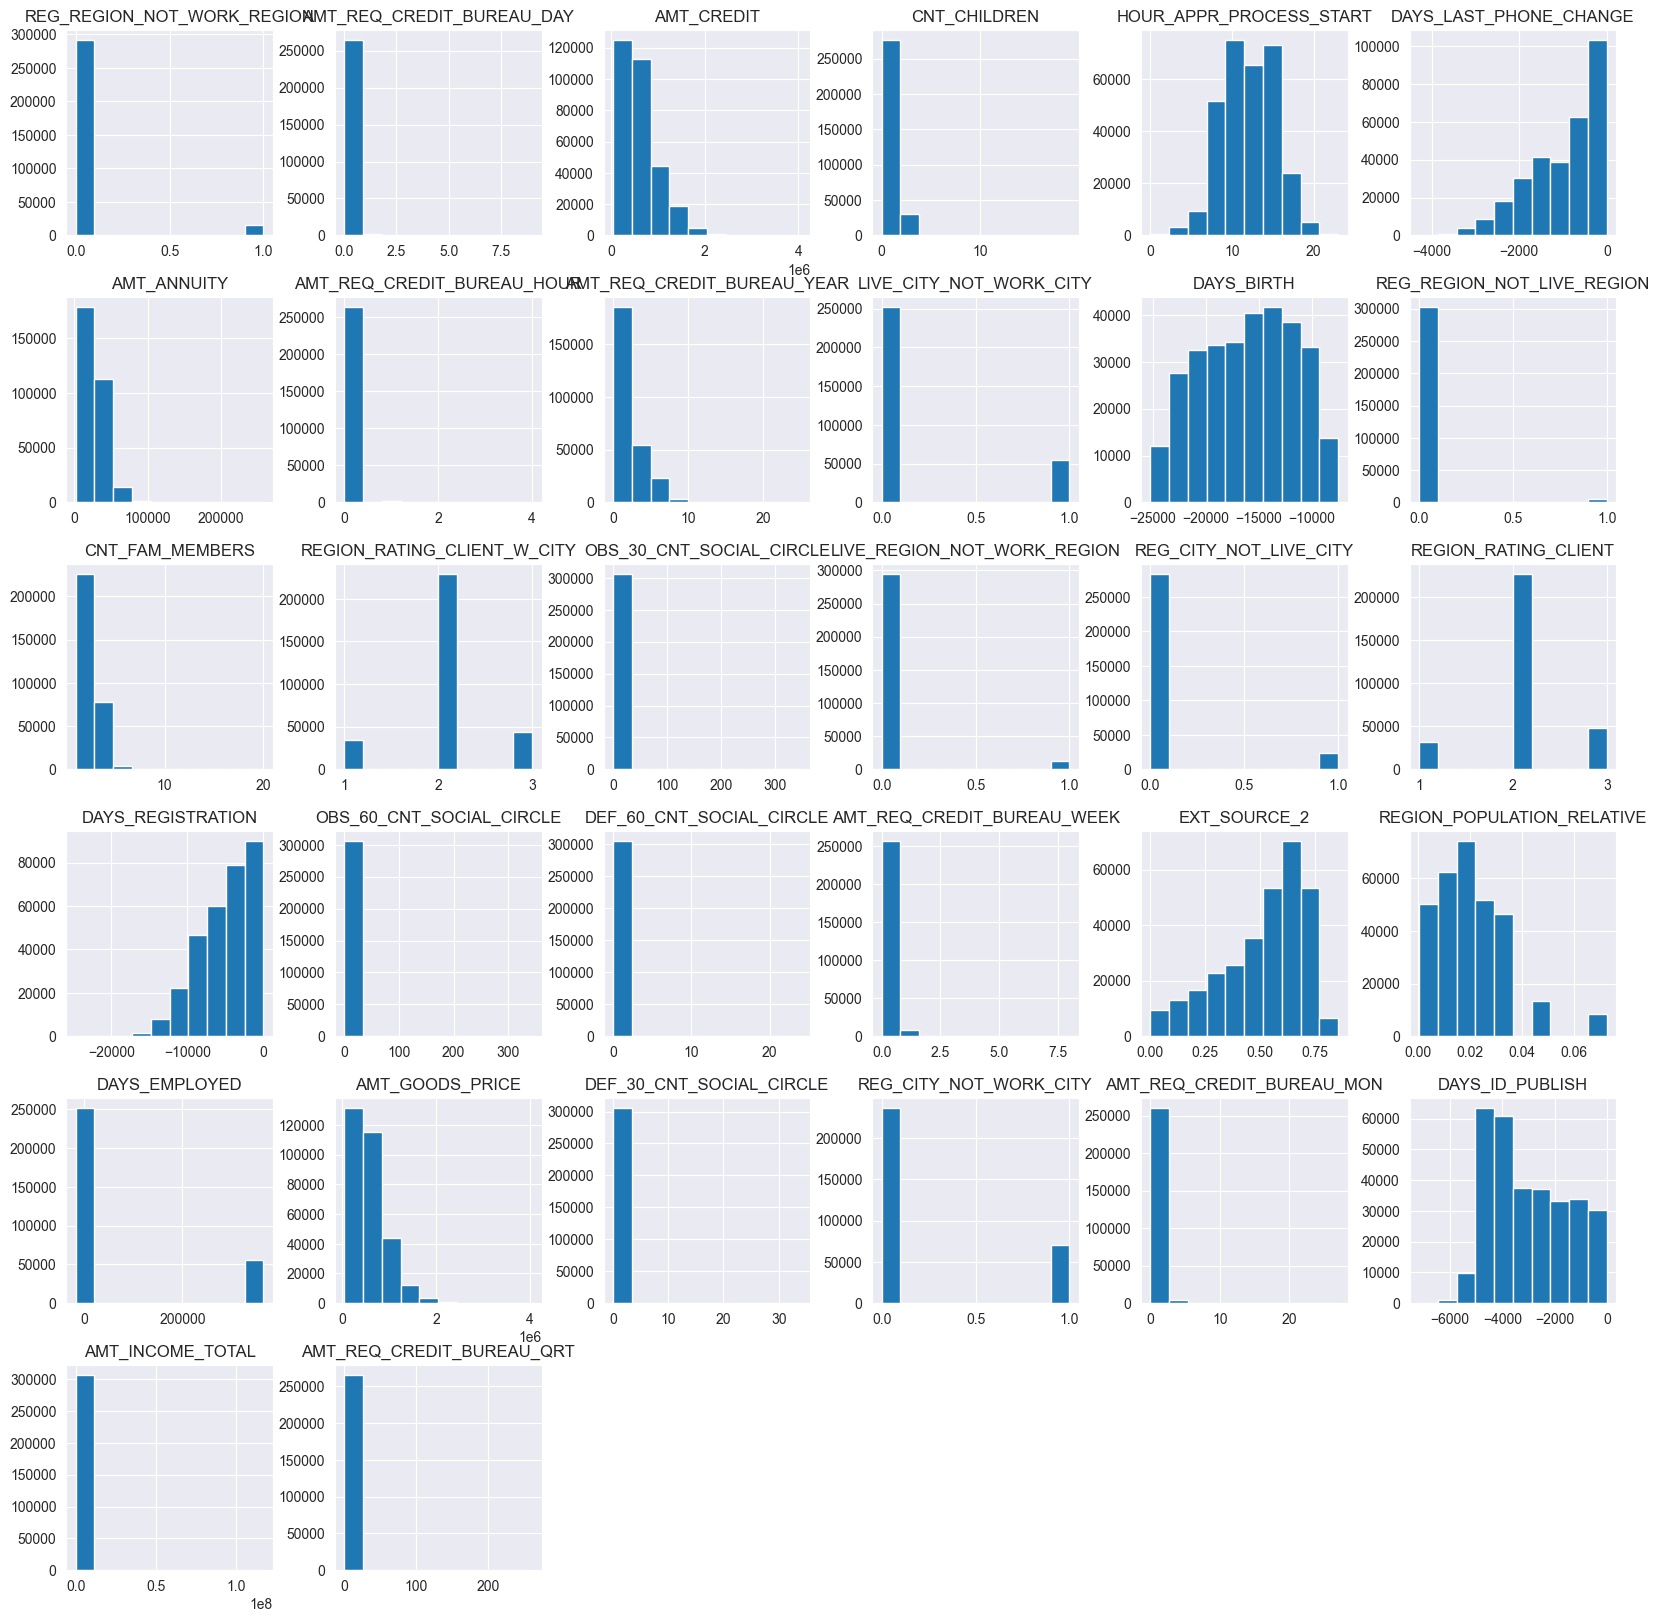

In [63]:
numerical.remove("TARGET")
train_data[numerical].hist(figsize=(20, 20))
plt.show()

Тепер оцінемо box plot цих змінних

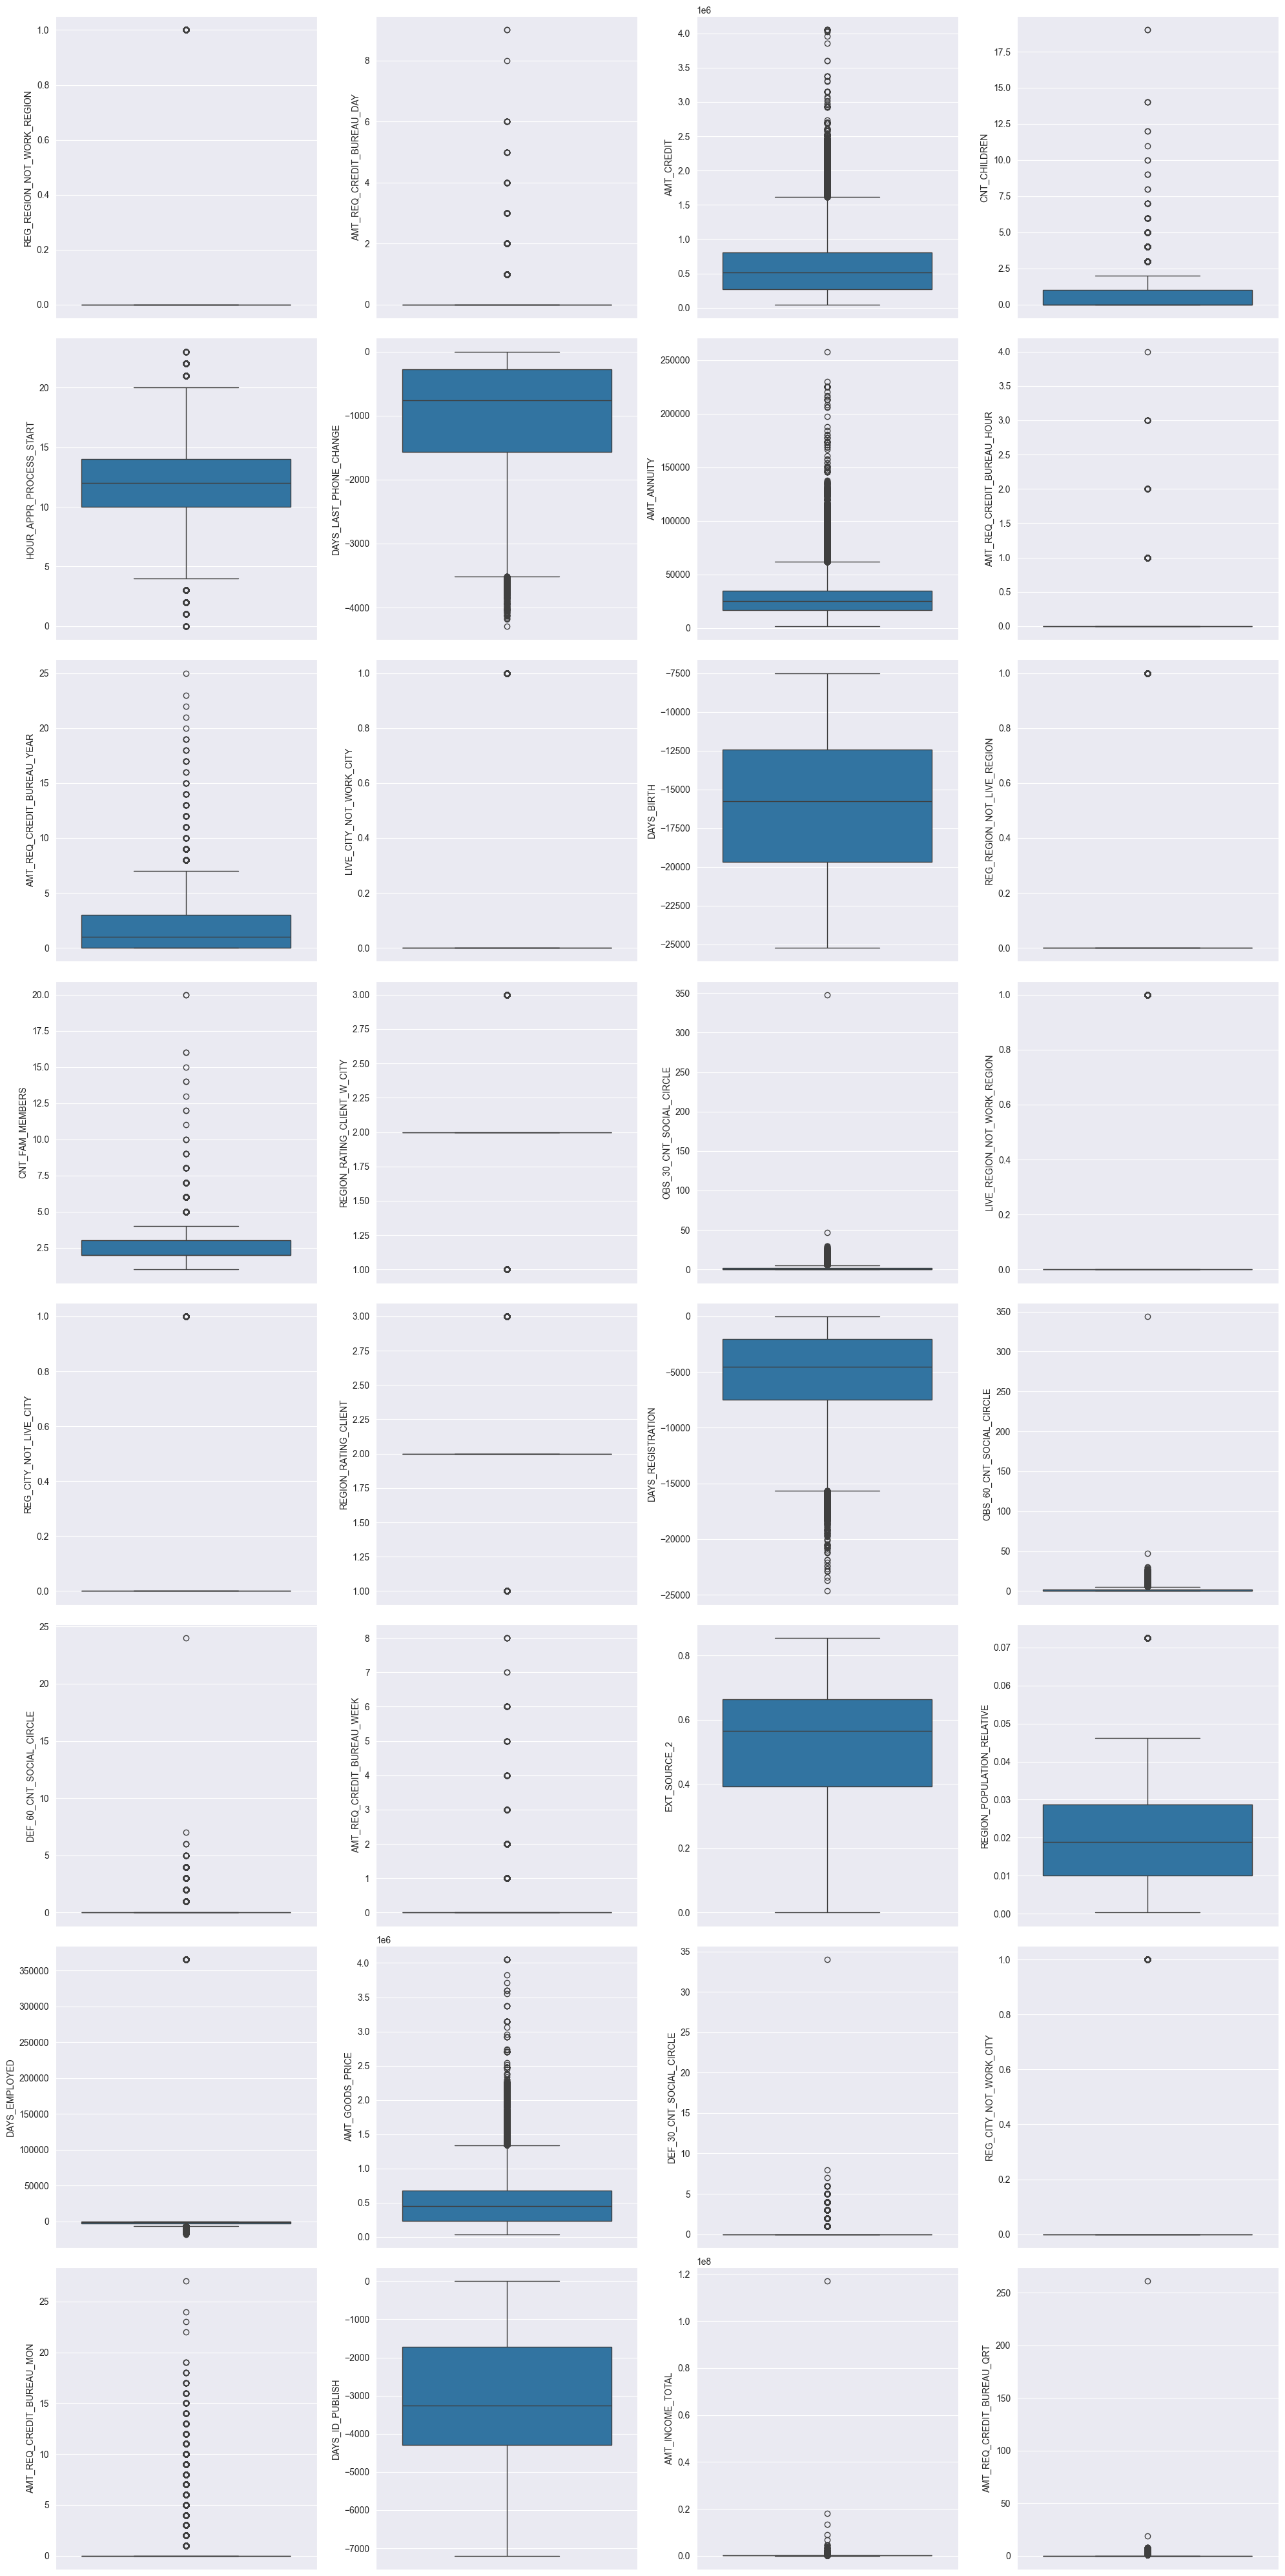

In [64]:
fig_num, axs_num = plt.subplots(nrows=len(numerical)//4, ncols=4, figsize=(20, 40))

for i, col in enumerate(numerical):
    sns.boxplot(train_data[col], ax=axs_num[i//4, i%4])

plt.tight_layout()
plt.show()

Як бачимо з графіків маємо певні викиди які треба буде почистити

Розподіл категоріальних даних

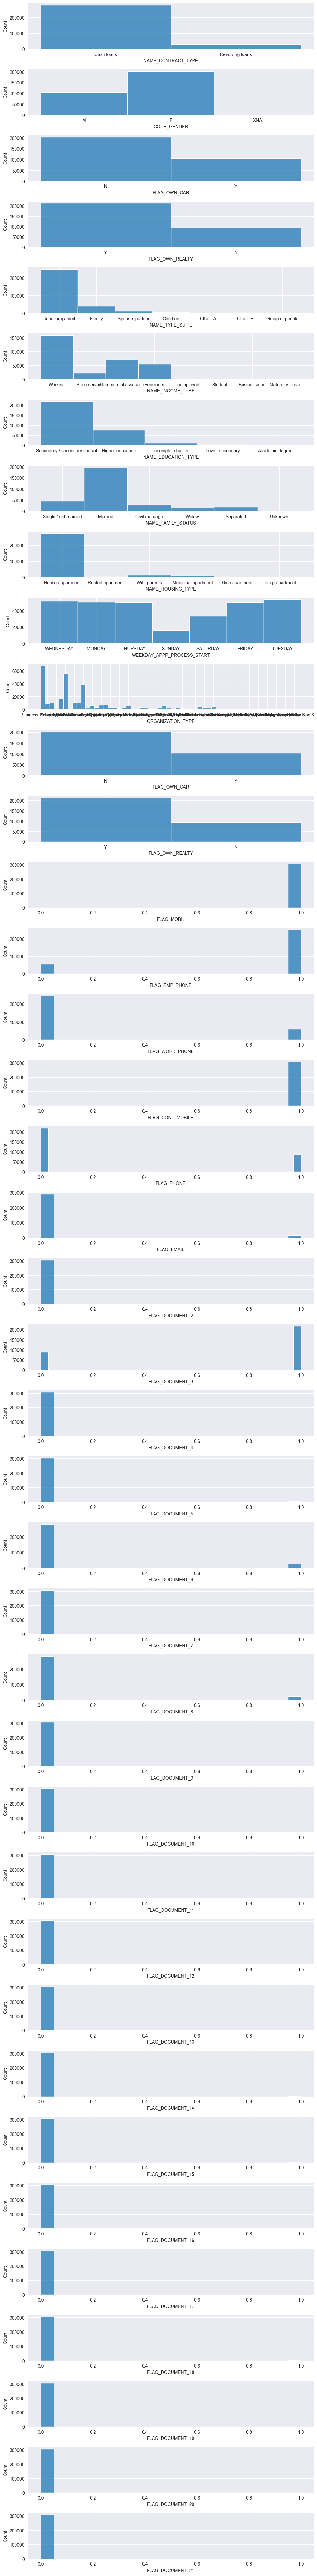

In [65]:
fig, axes = plt.subplots(nrows=len(train_data[categorical].columns), ncols=1)
fig.set_size_inches(10, 80)

for i, col in enumerate(train_data[categorical].columns):
    sns.histplot(train_data[col], kde=False, ax=axes[i])

plt.tight_layout()
plt.show()

Різниця між тестовими і тренованими даними

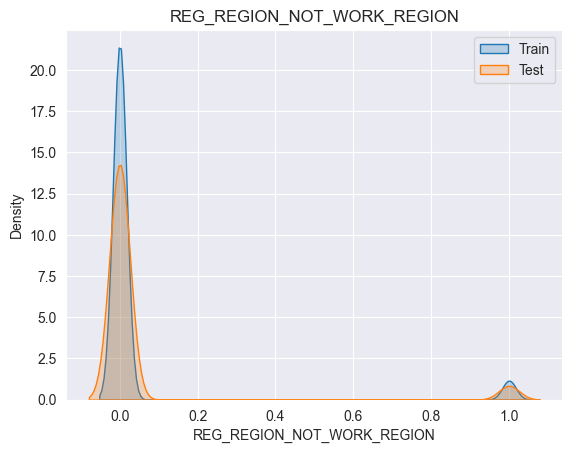

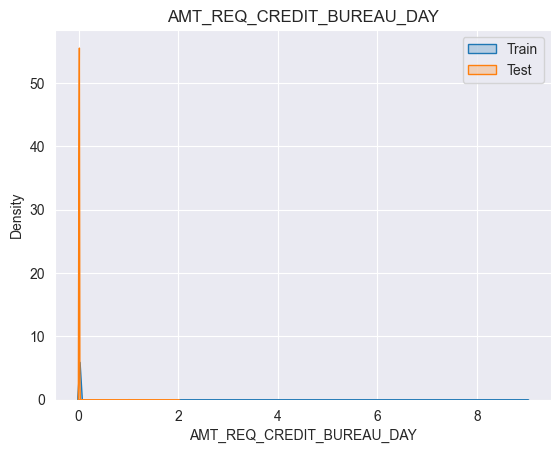

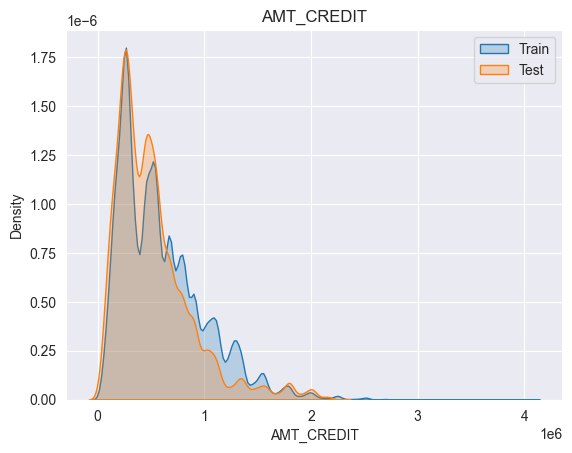

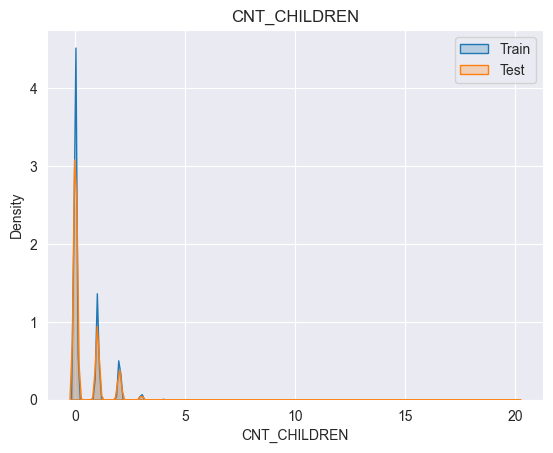

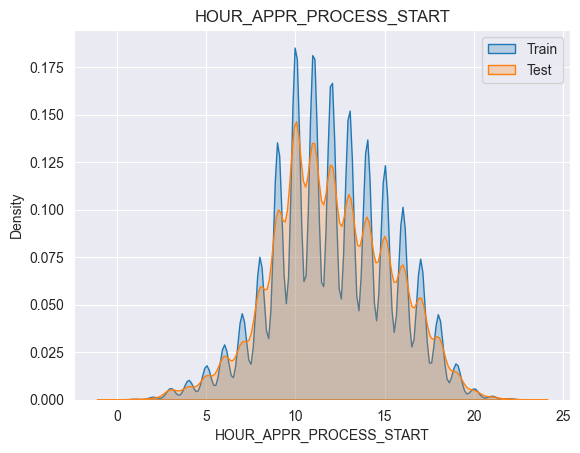

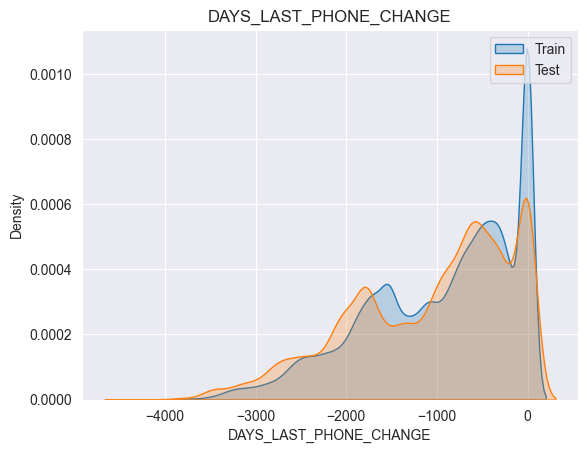

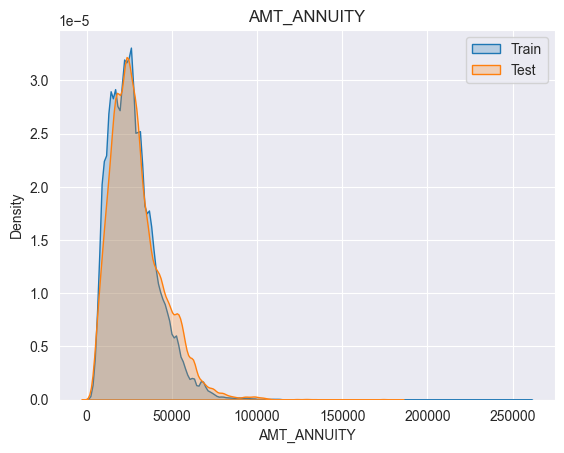

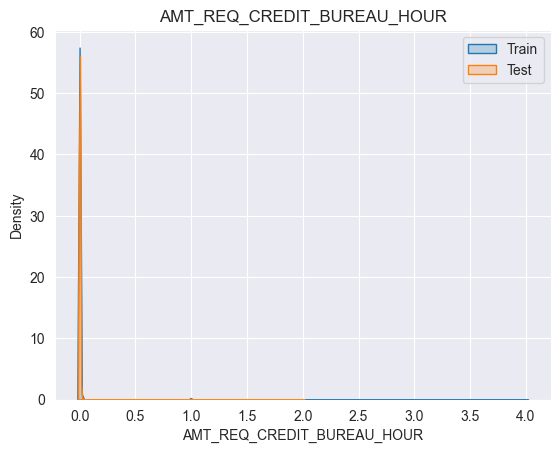

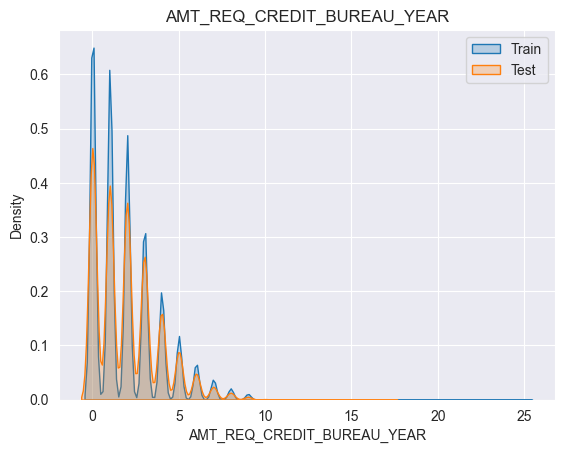

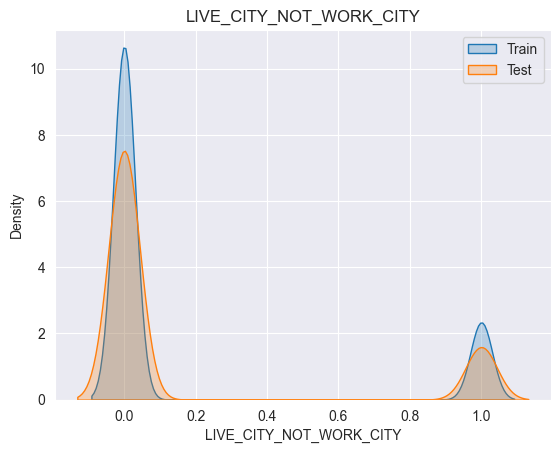

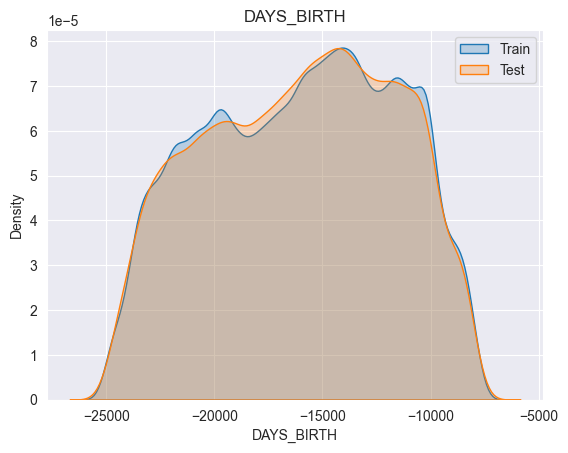

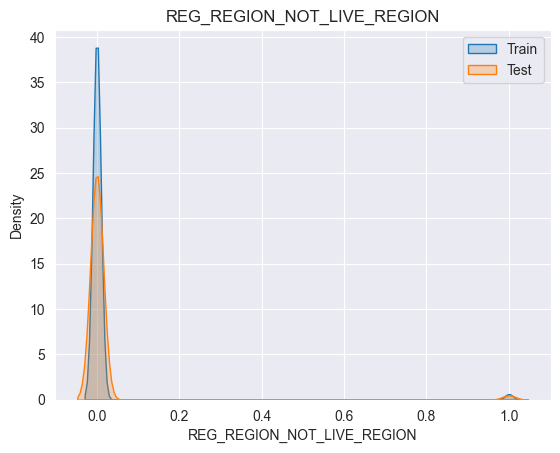

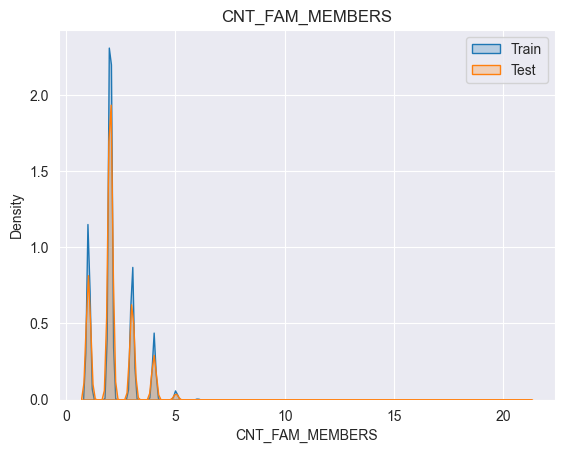

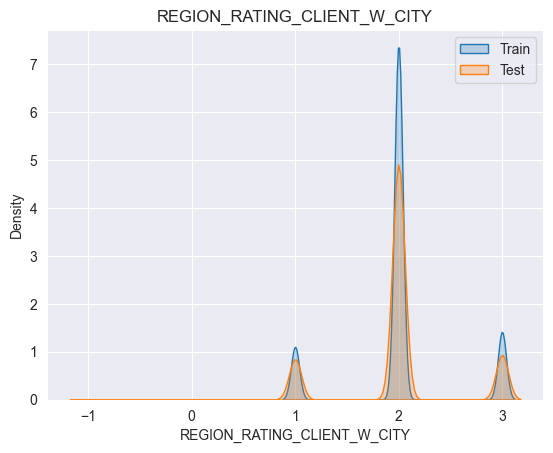

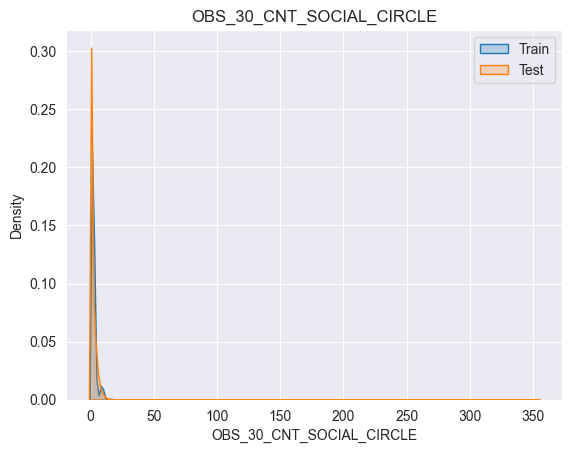

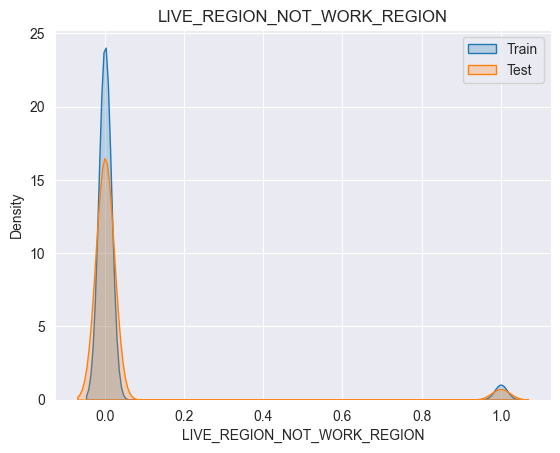

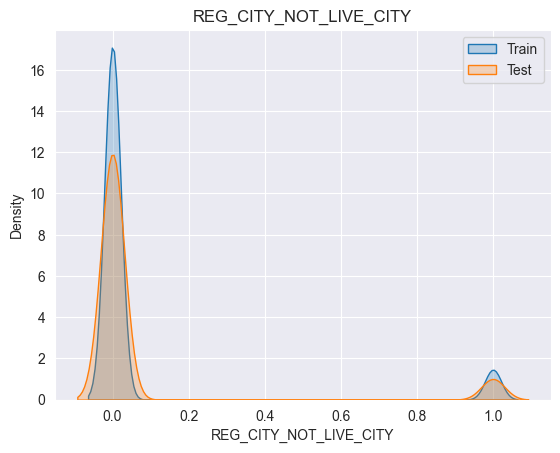

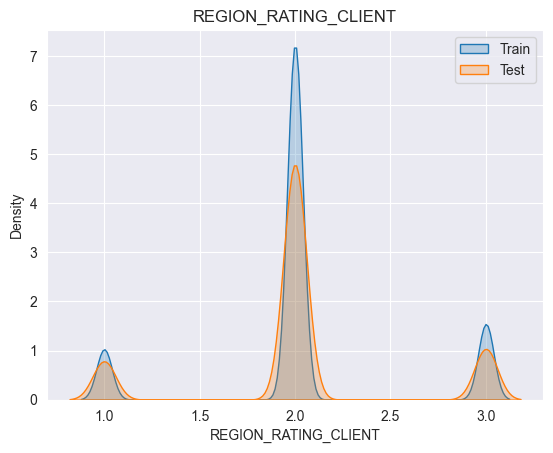

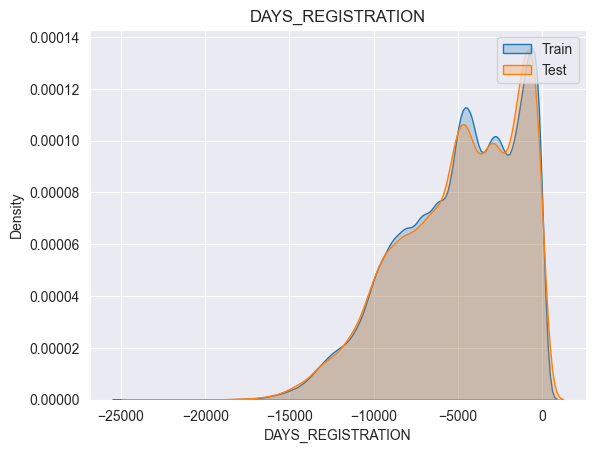

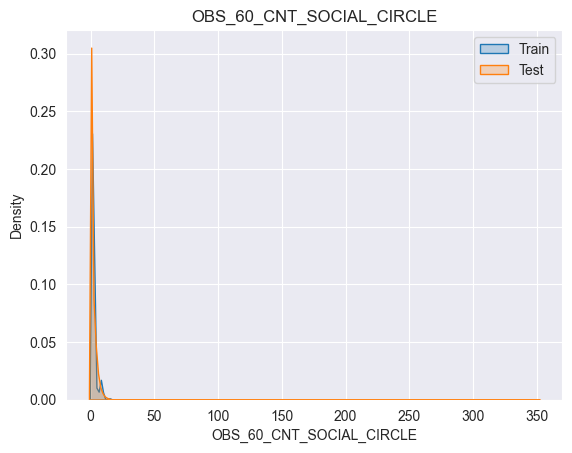

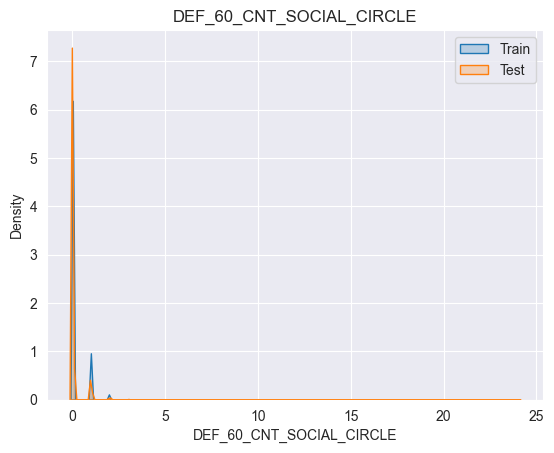

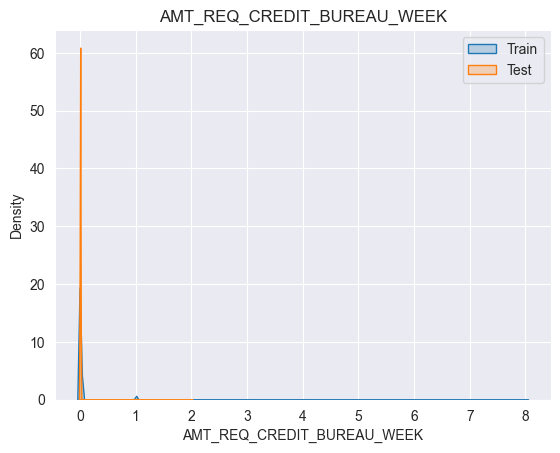

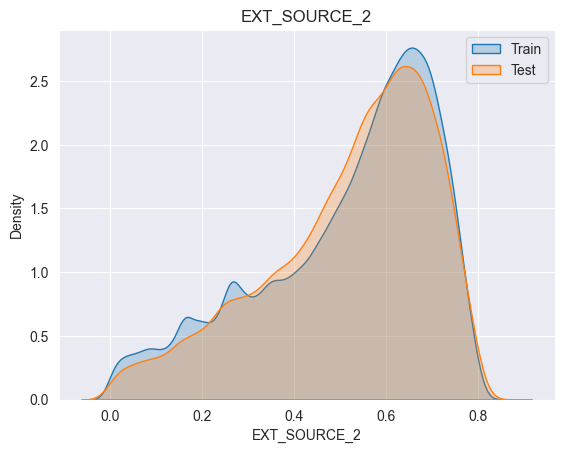

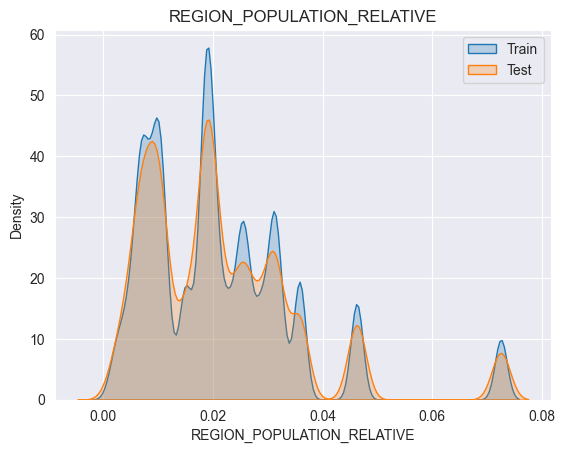

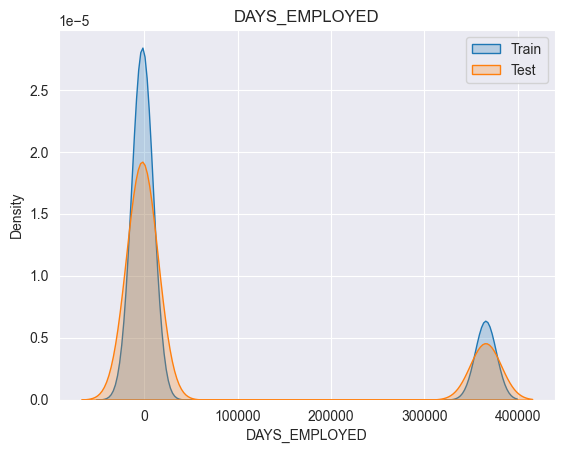

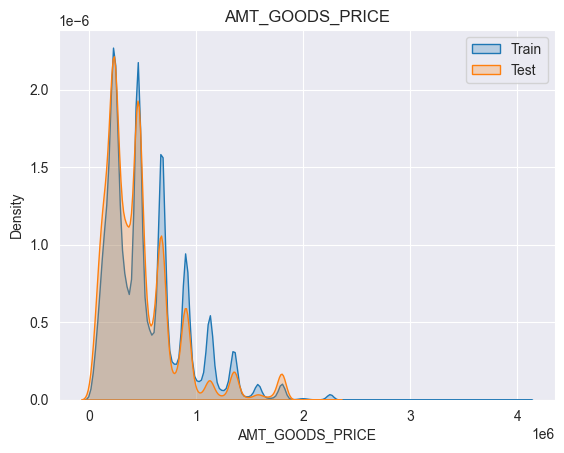

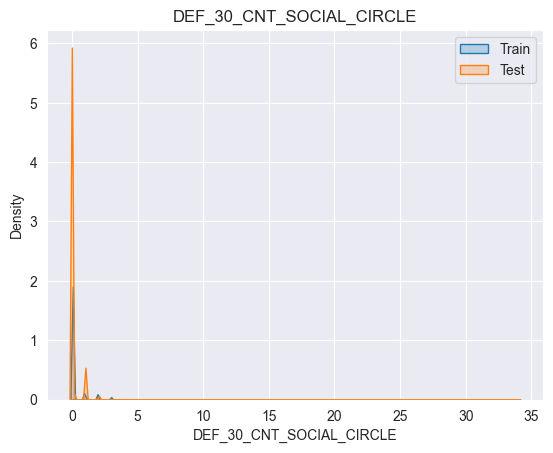

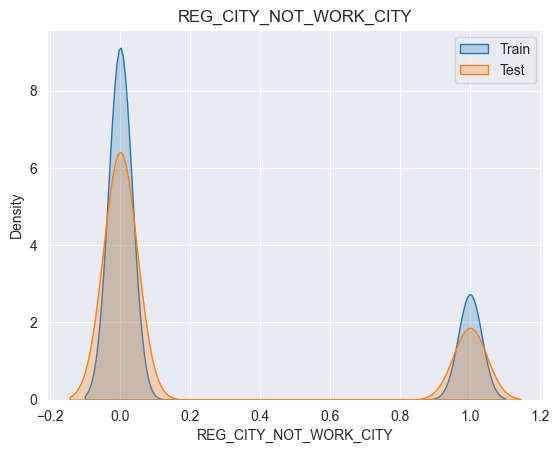

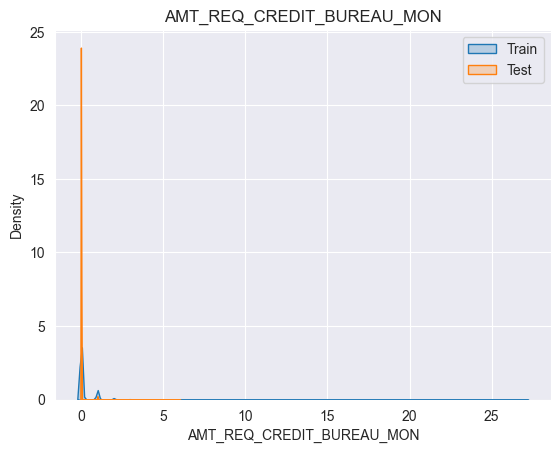

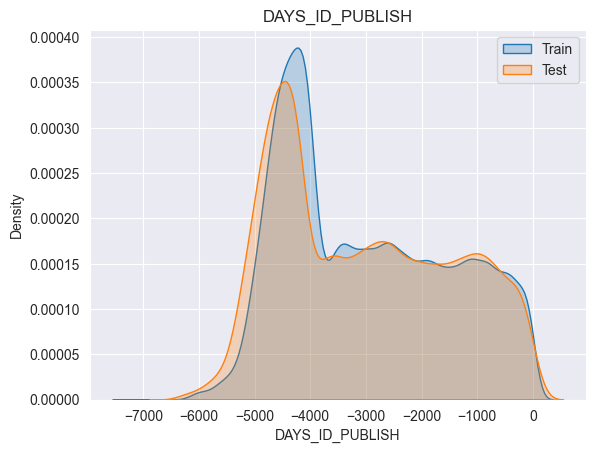

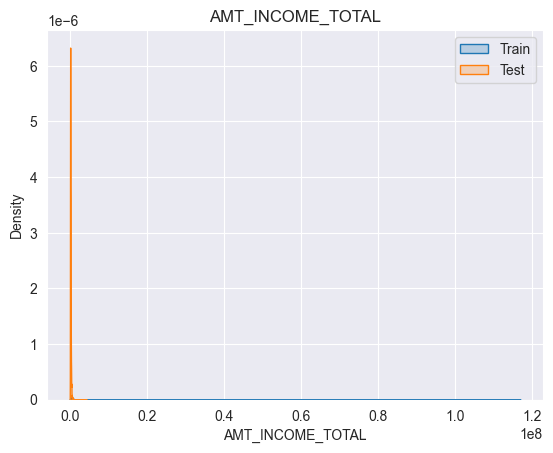

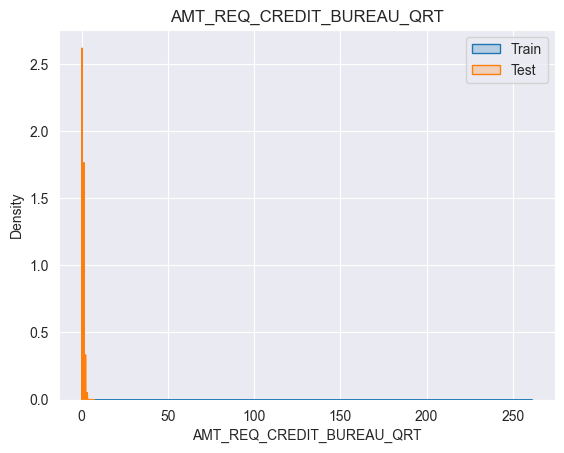

In [66]:
for f in train_data[numerical]:
    if f != 'TARGET':
        sns.kdeplot(data=train_data[f], label='Train', fill=True)
        sns.kdeplot(data=test_data[f], label='Test', fill=True)
        plt.title(f)
        plt.legend()
        plt.show()

Підготуємо дані, замінивши відсутні числові значення на середнє, а для категоріальних на моду. Також почистимо числові дані від викидів заміниши на середнє

In [67]:
def fill_absent(data_set):
    data = data_set.copy()
    
    for col in categorical:
        data[col] = data[col].fillna(data[col].mode()[0])
    
    for col in numerical:
        data[col] = data[col].fillna(data[col].mean())
        
    return data

In [68]:
filled_train = fill_absent(train_data)
filled_test = fill_absent(test_data)

In [69]:
def remove_outliers(data_set):
    data = data_set.copy()
    
    for col in numerical:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    
    return data

In [70]:
filled_balanced_train = remove_outliers(filled_train)

Натренуємо модель

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import precision_score, roc_auc_score, recall_score, f1_score 

In [72]:
transformer = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(), categorical),
        ('numerical', StandardScaler(), numerical)
    ]
)
transformer.fit(filled_balanced_train)

ColumnTransformer(transformers=[('categorical', OneHotEncoder(),
                                 ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
                                  'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                                  'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                                  'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                  'NAME_HOUSING_TYPE',
                                  'WEEKDAY_APPR_PROCESS_START',
                                  'ORGANIZATION_TYPE', 'FLAG_OWN_CAR',
                                  'FLAG_OWN_REALTY', 'FLAG_MOBIL',
                                  'FLAG_EMP_PHONE', 'FLAG_...
                                  'LIVE_REGION_NOT_WORK_REGION',
                                  'REG_CITY_NOT_LIVE_CITY',
                                  'REGION_RATING_CLIENT', 'DAYS_REGISTRATION',
                                  'OBS_60_CNT_SOCIAL_CIRCLE',
                                  'DEF_60_CNT_SOCIAL_CIRCLE',
                                  'AMT_REQ_CREDIT_BUREAU_WEEK', 'EXT_SOURCE_2',
                                  'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
                                  'AMT_GOODS_PRICE', 'DEF_30_CNT_SOCIAL_CIRCLE',
                                  'REG_CITY_NOT_WORK_CITY',
                                  'AMT_REQ_CREDIT_BUREAU_MON',
                                  'DAYS_ID_PUBLISH', ...])])

Перетворимо дані

In [73]:
X_train = transformer.transform(filled_balanced_train)
Y_train = filled_balanced_train['TARGET']
X_test = transformer.transform(filled_test)

In [74]:
X_train_s, X_valid, Y_train_s, Y_valid = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [75]:
clf = LogisticRegression(class_weight = "balanced", max_iter=2000)
clf.fit(X_train_s, Y_train_s)

LogisticRegression(class_weight='balanced', max_iter=2000)

Оцінимо модель

In [76]:
Y_pred = clf.predict(X_valid)
precision = precision_score(Y_valid, Y_pred)
recall = recall_score(Y_valid, Y_pred)
f1 = f1_score(Y_valid, Y_pred)
roc_auc = roc_auc_score(Y_valid, clf.predict_proba(X_valid)[:, 1])

print('precision = ', precision, '\nrecall = ', recall, '\nf1 = ', f1)
print('roc auc score = ', roc_auc)

precision =  0.1426770859591631 
recall =  0.6399612340494266 
f1 =  0.23333333333333334
roc auc score =  0.7100989434022646


In [77]:
test_predict = clf.predict(X_test)

In [78]:
last = pd.read_csv("./data/sample_submission.csv")
last["TARGET"] = test_predict
last.to_csv("./data/sample_submission.csv", index=False)

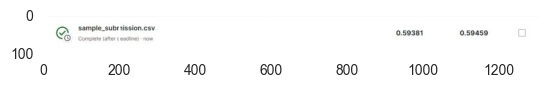

In [79]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("./data/img.png")
plt.imshow(img)
plt.show()